In [59]:
import cv2
import serial
import time
import numpy as np
import urllib.request
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
tamx=155
tamy=10

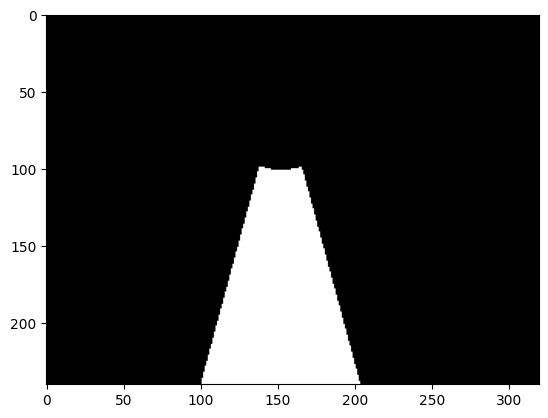

In [61]:

    img90=np.zeros((240,320),dtype=np.uint8)
    cv2.ellipse(img90, (152,50), (300,300), 0, 75, 105, (255,255,255), -1)
    cv2.ellipse(img90, (152,50), (50,50), 0, 0, 180, (0,0,0), -1)
    plt.imshow(img90,cmap="gray")

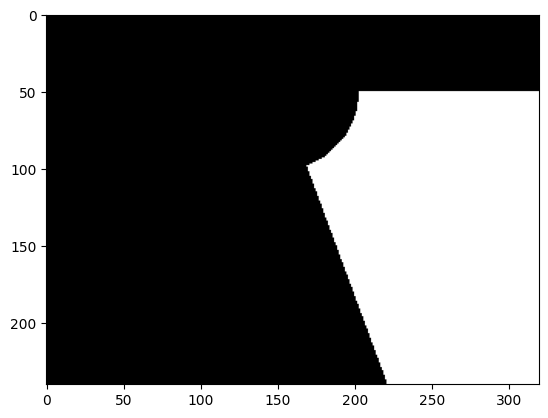

In [62]:
img135=np.zeros((240,320),dtype=np.uint8)
cv2.ellipse(img135, (152,50), (300,300), 0, 0, 70, (255,255,255), -1)
cv2.ellipse(img135, (152,50), (50,50), 0, 0, 180, (0,0,0), -1)
plt.imshow(img135,cmap="gray")

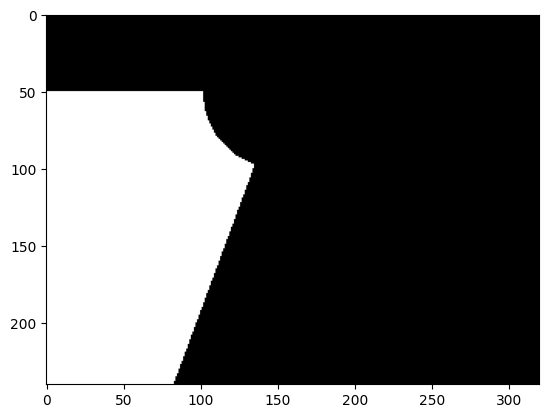

In [63]:
img45=np.zeros((240,320),dtype=np.uint8)
cv2.ellipse(img45, (152,50), (300,300), 0, 110, 180, (255,255,255), -1)
cv2.ellipse(img45, (152,50), (50,50), 0, 0, 180, (0,0,0), -1)
plt.imshow(img45,cmap="gray")

In [64]:
def count_pixel (img):
    return np.count_nonzero(img)

In [65]:
DataSerial = serial.Serial('COM9',9600)
time.sleep(2)
def input_Arduino(data):
    DataSerial.write(data.encode()) 
    print(data)


In [66]:
def vitri(x):
    if x == 1:
        return 1
    if x ==2:
        return 2
    if x== 3:
        return 3

In [67]:
url = 'http://192.168.1.36/cam-lo.jpg'


# Create a VideoCapture object
cap = cv2.VideoCapture(url)

# Check if the IP camera stream is opened successfullya
if not cap.isOpened():
    print("Failed to open the IP camera stream")
    exit()

# Read and display video frames
while True:
    # Read a frame from the video stream
    input_Arduino("goc")
    time.sleep(3)
    img_resp = urllib.request.urlopen(url)
    imgnp = np.array(bytearray(img_resp.read()), dtype=np.uint8)
    # ret, frame = cap.read()
    img = cv2.imdecode(imgnp, -1)

    

    gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    mm=np.max(gray_img)
    if mm!=0:
       gray_img=gray_img/mm*255
       gray_img = gray_img.astype(np.uint8)
    a,result = cv2.threshold(gray_img, 230, 255, cv2.THRESH_BINARY )
    result_45=cv2.bitwise_and(result,img45)
    result_90=cv2.bitwise_and(result,img90)
    result_135=cv2.bitwise_and(result,img135)

    max_value = 0
    dem = 0
    x1=count_pixel(result_45)
    x2=count_pixel(result_90)
    x3=count_pixel(result_135)
    
    f =[x1,x2,x3]
    for i in f:
        if i>=max_value:
            max_value=i
            dem = dem+1
    a = vitri(dem)
    if a==1: input_Arduino('g45')
    if a==2 : input_Arduino('g90')
    if a==3 : input_Arduino('g135')
    time.sleep(5)
    
    



goc
g135
goc
g45
goc
g90
goc
g135
goc
g45
goc
g90
goc
g45
goc
g90
goc
g135
goc
g135
goc
g45
goc
g90
goc
g45
goc
g135
goc
g135
goc
g45
goc
g45
goc
g90
goc
g135
goc
g45
goc
g45
goc
g135
goc


KeyboardInterrupt: 

In [ ]:
DataSerial.close()